In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
df = pd.read_csv("../data/data.csv")

In [4]:
df.head(n=20)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date,Customer Rating
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.25 USD,38.94,...,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20,NaN
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.81 USD,208.16,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02,Excellent
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075 USD,8.69,...,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03,NaN
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.971 USD,195.99,...,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12,Excellent
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.94 USD,21.78,...,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30,NaN
5,86,515,2010-08-28,Not Specified,21,146.6900,0.05,Regular Air,4.43 USD,6.64,...,Nunavut,Nunavut,Consumer,Furniture,Office Furnishings,G.E. Longer-Life Indoor Recessed Floodlight Bulbs,Small Pack,0.37,2010-08-30,NaN
6,97,613,2011-06-17,High,12,93.5400,0.03,Regular Air,-54.0385 USD,7.30,...,Nunavut,Nunavut,Corporate,Office Supplies,Binders and Binder Accessories,"Angle-D Binders with Locking Rings, Label Holders",Small Box,0.38,2011-06-17,NaN
7,98,613,2011-06-17,High,22,905.0800,0.09,Regular Air,127.7 USD,42.76,...,Nunavut,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Mobile Desk Side File, Wire Frame",Small Box,NaN,2011-06-18,NaN
8,107,678,2010-02-26,Low,44,228.4100,0.07,Regular Air,-226.36 USD,4.98,...,Nunavut,Nunavut,Home Office,Office Supplies,Paper,Xerox 198,Small Box,0.38,2010-02-26,NaN
9,127,807,2010-11-23,Medium,45,196.8500,0.01,Regular Air,-166.85 USD,4.28,...,Nunavut,Nunavut,Home Office,Office Supplies,Paper,Xerox 1980,Small Box,0.40,2010-11-24,Excellent


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                7056 non-null   int64  
 1   Order ID              7056 non-null   int64  
 2   Order Date            7056 non-null   object 
 3   Order Priority        7056 non-null   object 
 4   Order Quantity        7056 non-null   int64  
 5   Sales                 7056 non-null   float64
 6   Discount              7056 non-null   float64
 7   Ship Mode             6730 non-null   object 
 8   Profit                7056 non-null   object 
 9   Unit Price            7056 non-null   float64
 10  Shipping Cost         7056 non-null   float64
 11  Customer Name         7056 non-null   object 
 12  Province              7056 non-null   object 
 13  Region                7056 non-null   object 
 14  Customer Segment      7056 non-null   object 
 15  Product Category     

In [6]:
df.drop(columns=["Customer Rating"], inplace=True)

In [7]:
df["Ship Mode"].fillna(df["Ship Mode"].mode()[0], inplace=True)

# df=df.dropna(subset='Ship Mode')

/tmp/ipykernel_31042/3575645575.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Ship Mode"].fillna(df["Ship Mode"].mode()[0], inplace=True)


In [8]:
def Profit (value) : 
    fixed_value = value.replace(" USD", "")
    return float(fixed_value)

df["Profit"] = df["Profit"].apply(Profit)

In [9]:
df["Product Category"].value_counts()

Product Category
Office Supplies    3838
Technology         1734
Furniture          1484
Name: count, dtype: int64

In [10]:
df.drop(columns=["Row ID" , "Order ID"] , inplace=True)

In [11]:
df.duplicated().sum()

336

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6720 entries, 0 to 6719
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Date            6720 non-null   object 
 1   Order Priority        6720 non-null   object 
 2   Order Quantity        6720 non-null   int64  
 3   Sales                 6720 non-null   float64
 4   Discount              6720 non-null   float64
 5   Ship Mode             6720 non-null   object 
 6   Profit                6720 non-null   float64
 7   Unit Price            6720 non-null   float64
 8   Shipping Cost         6720 non-null   float64
 9   Customer Name         6720 non-null   object 
 10  Province              6720 non-null   object 
 11  Region                6720 non-null   object 
 12  Customer Segment      6720 non-null   object 
 13  Product Category      6720 non-null   object 
 14  Product Sub-Category  6720 non-null   object 
 15  Product Name          6720

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print("Training set size:", len(train_set))
print("Test set size:", len(test_set))

numerical = ["Order Quantity", "Sales", "Unit Price", "Profit", "Shipping Cost", "Product Base Margin"]
categorical = ["Order Priority", "Product Category", "Product Sub-Category", "Product Container", "Product Name", "Province", "Region", "Customer Segment", "Ship Mode", "Customer Name"]

df_imputed_train = train_set.copy()
df_imputed_train["Discount"] = pd.to_numeric(df_imputed_train["Discount"], errors='coerce')

knn_imputer = KNNImputer(n_neighbors=5)
df_imputed_train[numerical + ["Discount"]] = knn_imputer.fit_transform(df_imputed_train[numerical + ["Discount"]])
df_imputed_train['Discount_knn'] = df_imputed_train['Discount']

df_imputed_test = test_set.copy()
df_imputed_test["Discount"] = pd.to_numeric(df_imputed_test["Discount"], errors='coerce')
df_imputed_test[numerical + ["Discount"]] = knn_imputer.transform(df_imputed_test[numerical + ["Discount"]])
df_imputed_test['Discount_knn'] = df_imputed_test['Discount']

print("\nMissing values in train before imputation:")
print(train_set[numerical + ["Discount"]].isna().sum())
print("\nMissing values in train after imputation:")
print(df_imputed_train[numerical + ["Discount"]].isna().sum())
print("\nMissing values in test before imputation:")
print(test_set[numerical + ["Discount"]].isna().sum())
print("\nMissing values in test after imputation:")
print(df_imputed_test[numerical + ["Discount"]].isna().sum())

train_set = df_imputed_train.copy()
test_set = df_imputed_test.copy()


Training set size: 5376
Test set size: 1344

Missing values in train before imputation:
Order Quantity          0
Sales                   0
Unit Price              0
Profit                  0
Shipping Cost           0
Product Base Margin    39
Discount                0
dtype: int64

Missing values in train after imputation:
Order Quantity         0
Sales                  0
Unit Price             0
Profit                 0
Shipping Cost          0
Product Base Margin    0
Discount               0
dtype: int64

Missing values in test before imputation:
Order Quantity          0
Sales                   0
Unit Price              0
Profit                  0
Shipping Cost           0
Product Base Margin    13
Discount                0
dtype: int64

Missing values in test after imputation:
Order Quantity         0
Sales                  0
Unit Price             0
Profit                 0
Shipping Cost          0
Product Base Margin    0
Discount               0
dtype: int64


In [15]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5376 entries, 1483 to 860
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Date            5376 non-null   object 
 1   Order Priority        5376 non-null   object 
 2   Order Quantity        5376 non-null   float64
 3   Sales                 5376 non-null   float64
 4   Discount              5376 non-null   float64
 5   Ship Mode             5376 non-null   object 
 6   Profit                5376 non-null   float64
 7   Unit Price            5376 non-null   float64
 8   Shipping Cost         5376 non-null   float64
 9   Customer Name         5376 non-null   object 
 10  Province              5376 non-null   object 
 11  Region                5376 non-null   object 
 12  Customer Segment      5376 non-null   object 
 13  Product Category      5376 non-null   object 
 14  Product Sub-Category  5376 non-null   object 
 15  Product Name          53

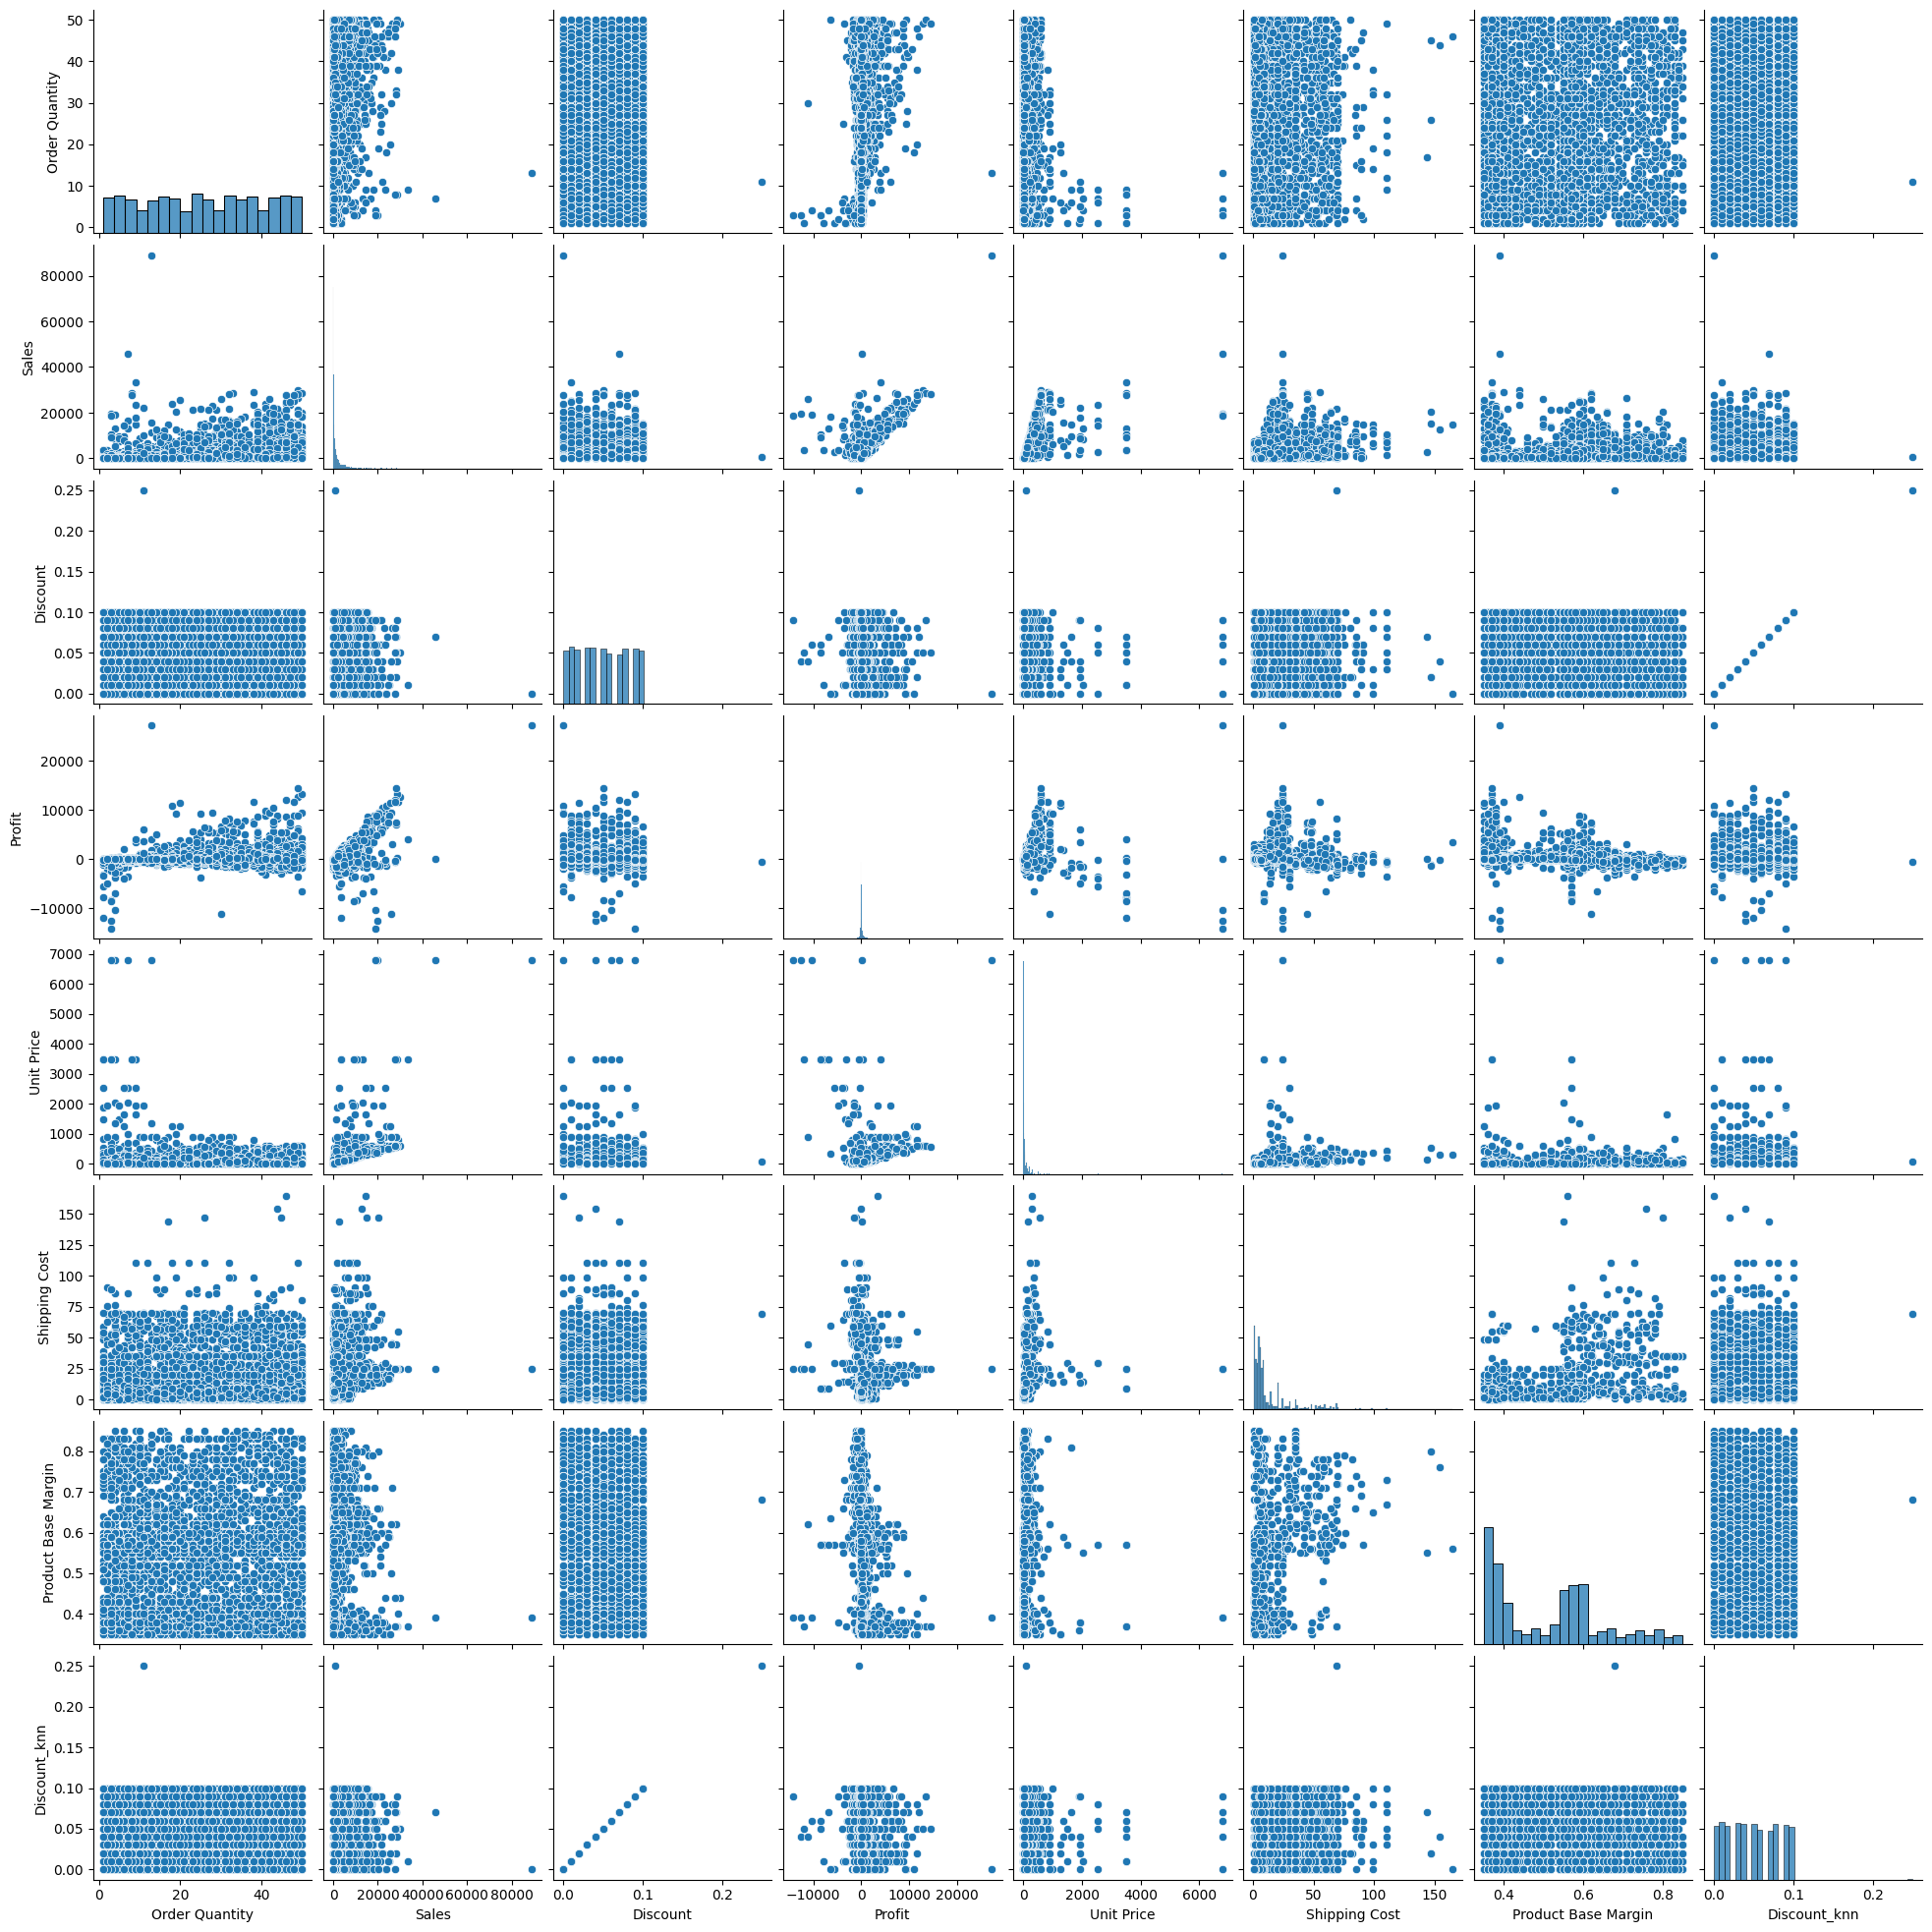

In [16]:
sns.pairplot(train_set)

In [17]:
numerical = ["Sales", "Unit Price", "Shipping Cost", "Product Base Margin", "Discount" , "Profit"]
categorical = ["Product Category", "Product Sub-Category", "Product Container", "Customer Segment", "Ship Mode", "Order Priority" , "Region" , "Province"]

Cramér’s V Correlation Matrix:
                      Product Category  Product Sub-Category  \
Product Category              1.000000              0.998696   
Product Sub-Category          0.998696              1.000000   
Product Container             0.494736              0.657258   
Customer Segment              0.009490              0.029360   
Ship Mode                     0.375335              0.600327   
Order Priority                0.022261              0.000000   
Region                        0.018450              0.008211   
Province                      0.000000              0.014963   

                      Product Container  Customer Segment  Ship Mode  \
Product Category               0.494736          0.009490   0.375335   
Product Sub-Category           0.657258          0.029360   0.600327   
Product Container              1.000000          0.000000   0.688094   
Customer Segment               0.000000          1.000000   0.000000   
Ship Mode                      0

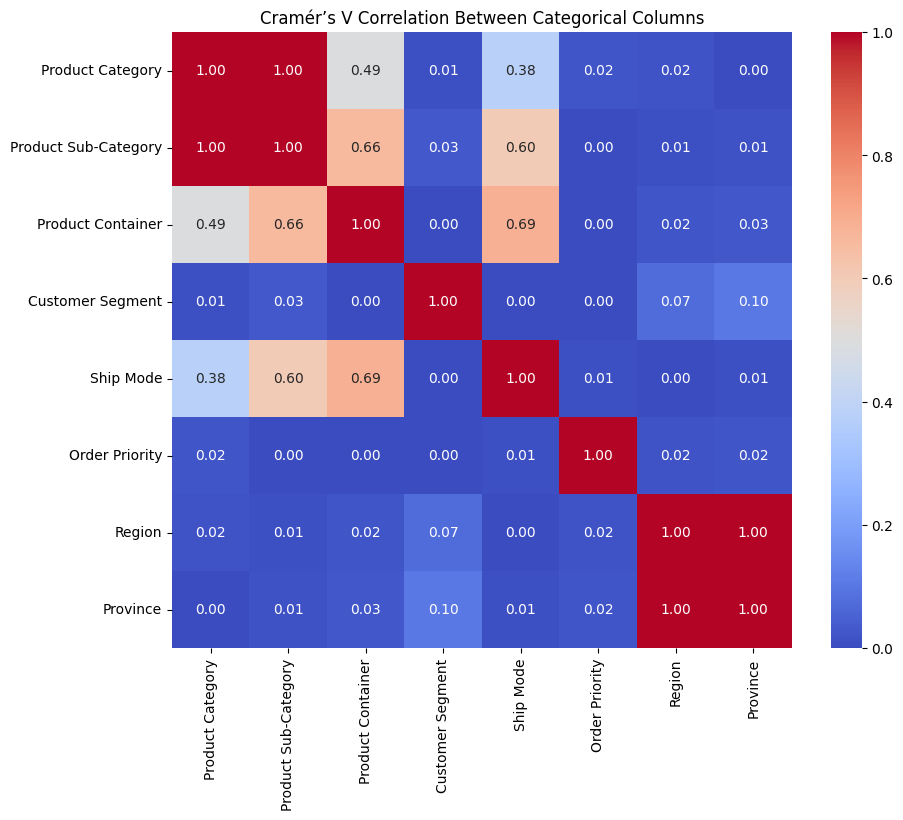

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

corr_matrix = pd.DataFrame(index=categorical, columns=categorical)
for col1 in categorical:
    for col2 in categorical:
        if col1 == col2:
            corr_matrix.loc[col1, col2] = 1.0
        else:
            corr_matrix.loc[col1, col2] = cramers_v(train_set[col1], train_set[col2])

corr_matrix = corr_matrix.astype(float)

print("Cramér’s V Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=0, vmax=1, fmt=".2f")
plt.title("Cramér’s V Correlation Between Categorical Columns")
plt.show()

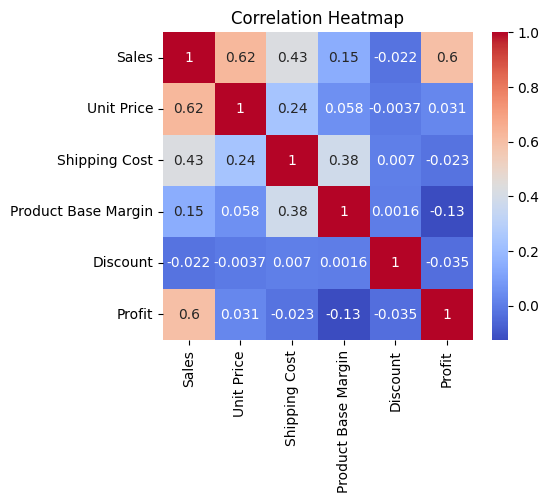

In [19]:
correlation_matrix = train_set[numerical].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


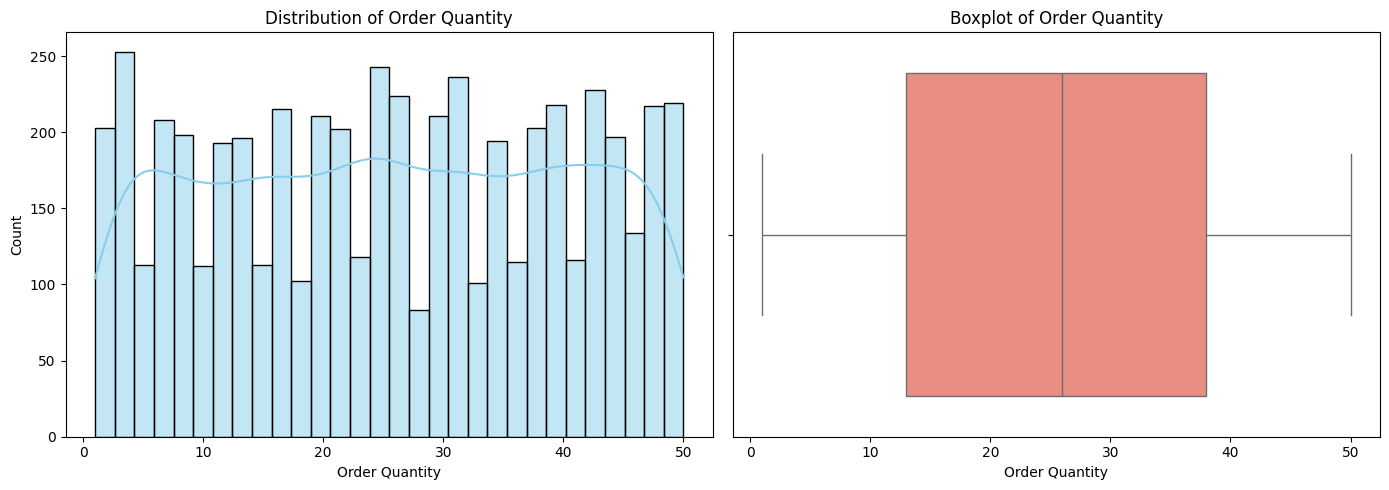

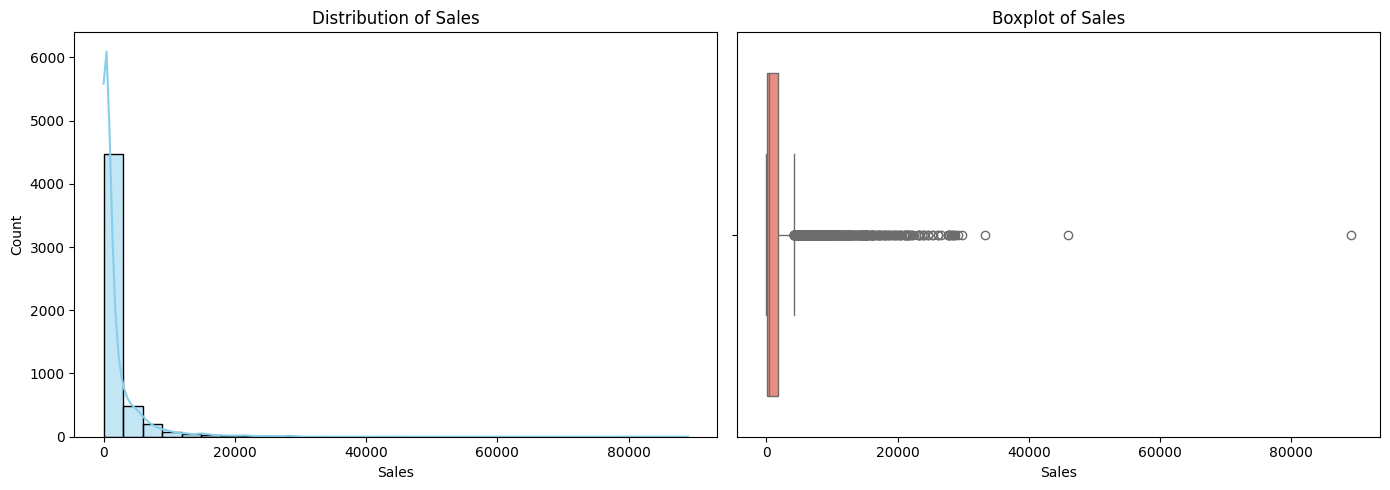

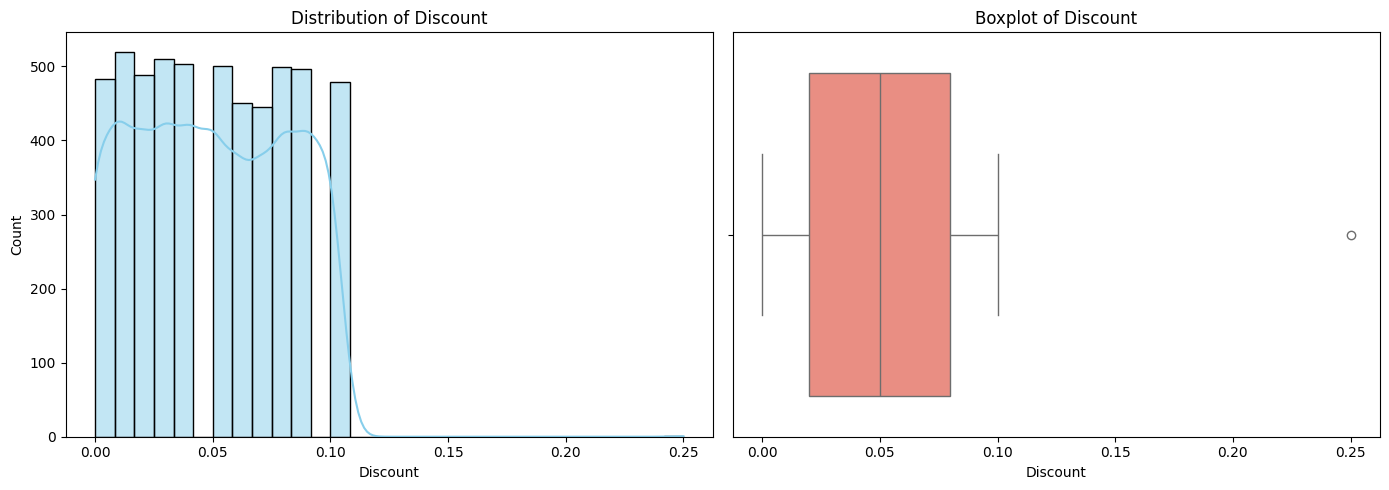

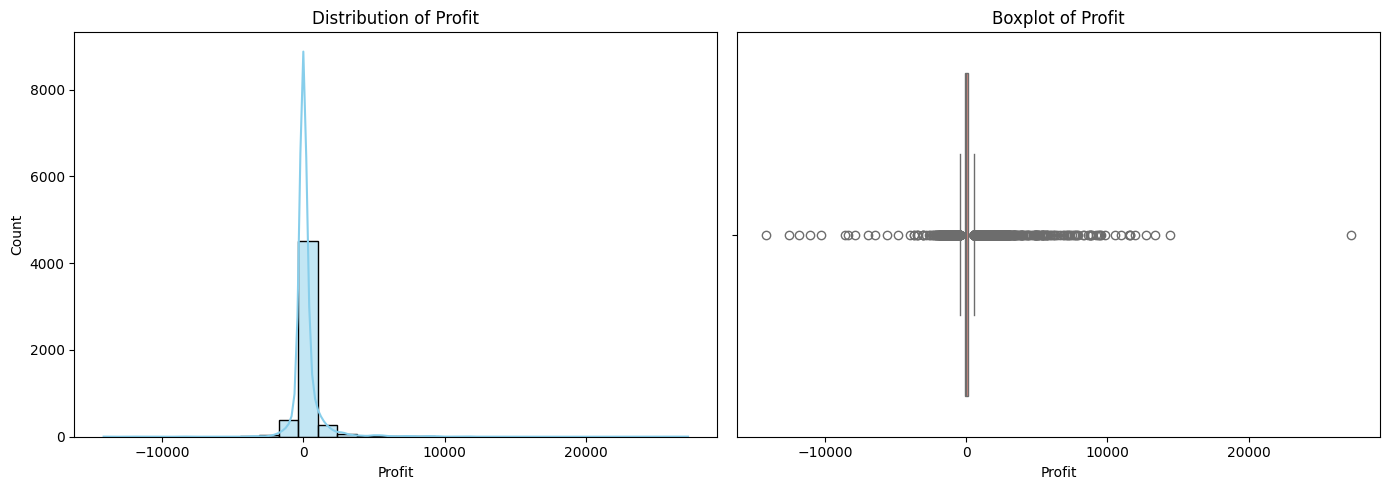

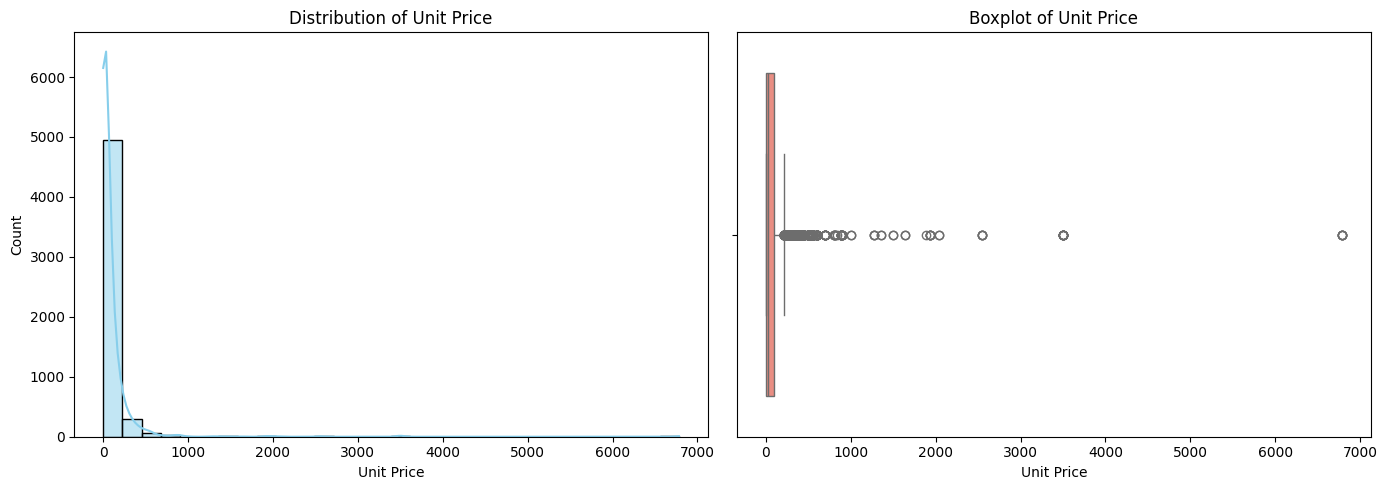

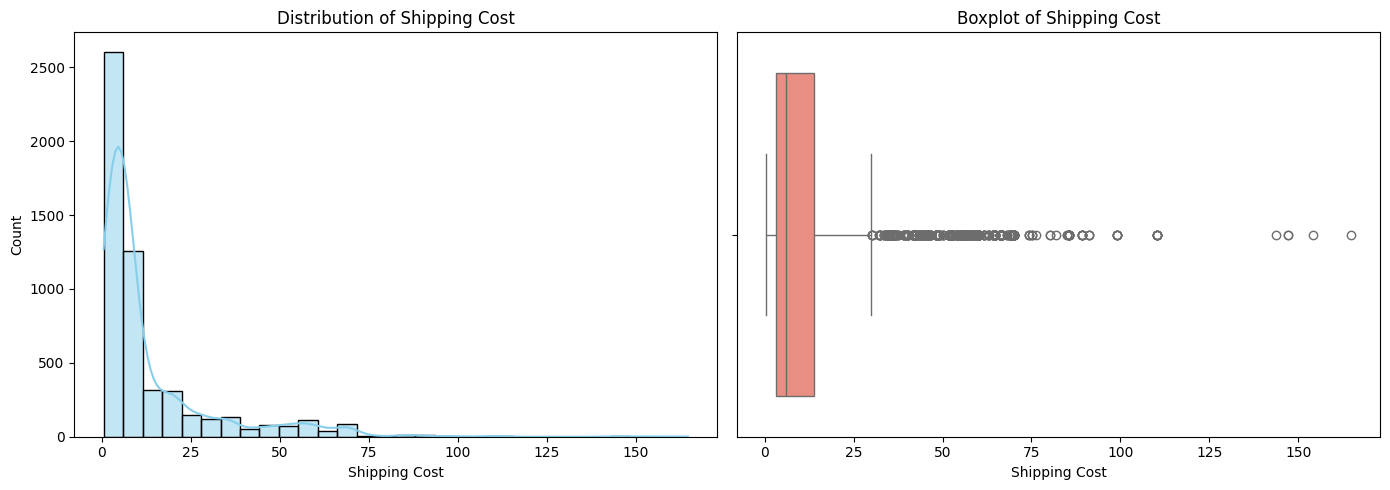

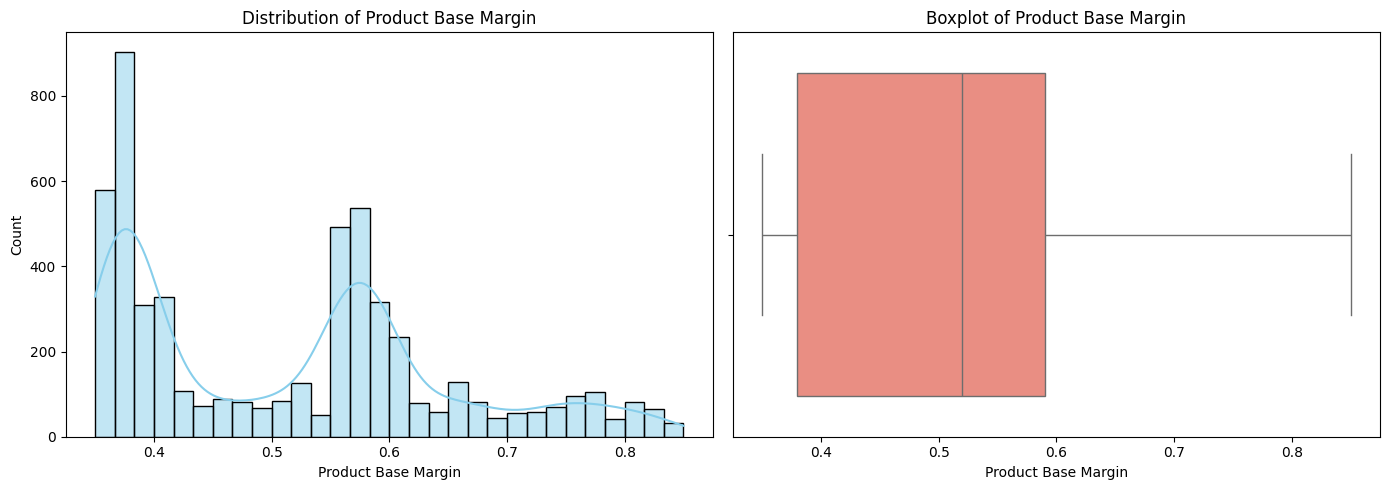

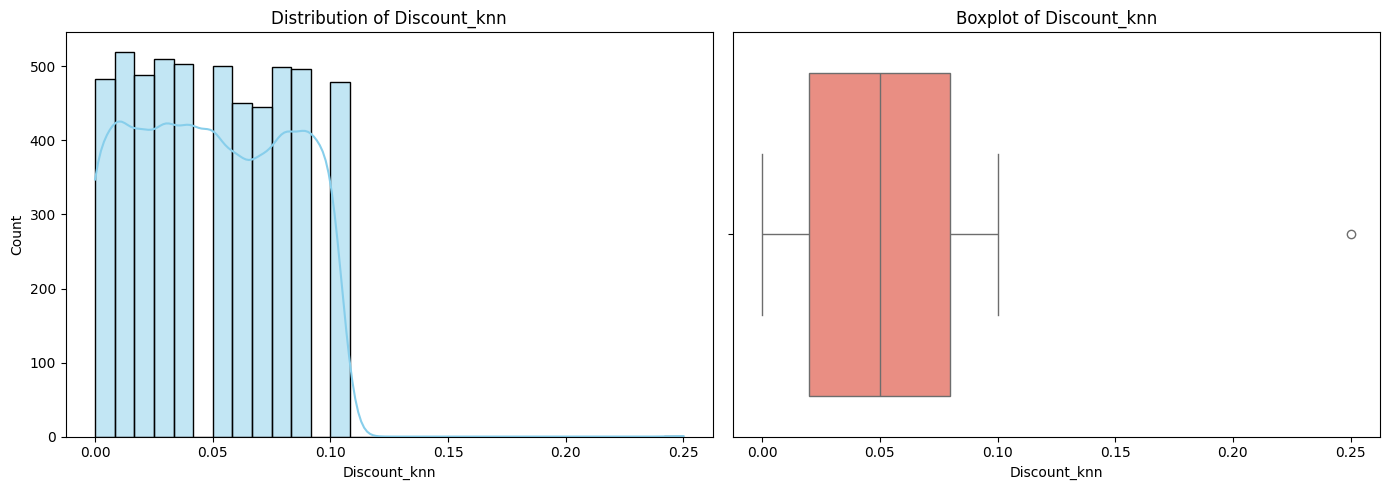

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_set['Order Date'] = pd.to_datetime(train_set['Order Date'], errors='coerce')
train_set['Ship Date'] = pd.to_datetime(train_set['Ship Date'], errors='coerce')

numeric_cols = train_set.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(train_set[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_set[col], color='salmon')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


In [20]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Lower bound for {column}: {lower_bound}")
    print(f"Upper bound for {column}: {upper_bound}")
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    print(f"Rows before outlier removal: {len(df)}")
    print(f"Rows after outlier removal: {len(filtered_df)}")
    return filtered_df

train_set = remove_outliers(train_set, "Profit")
test_set = remove_outliers(test_set, "Profit")

train_set = remove_outliers(train_set, "Unit Price")
test_set = remove_outliers(test_set, "Unit Price")

train_set = remove_outliers(train_set, "Sales")
test_set = remove_outliers(test_set, "Sales")

Lower bound for Profit: -452.31475
Upper bound for Profit: 532.89825
Rows before outlier removal: 5376
Rows after outlier removal: 4265
Lower bound for Profit: -439.95875
Upper bound for Profit: 538.17125
Rows before outlier removal: 1344
Rows after outlier removal: 1062
Lower bound for Unit Price: -45.370000000000005
Upper bound for Unit Price: 91.19
Rows before outlier removal: 4265
Rows after outlier removal: 3755
Lower bound for Unit Price: -42.38499999999999
Upper bound for Unit Price: 86.13499999999999
Rows before outlier removal: 1062
Rows after outlier removal: 931
Lower bound for Sales: -580.7174999999999
Upper bound for Sales: 1240.7424999999998
Rows before outlier removal: 3755
Rows after outlier removal: 3467
Lower bound for Sales: -591.0075
Upper bound for Sales: 1238.4524999999999
Rows before outlier removal: 931
Rows after outlier removal: 860


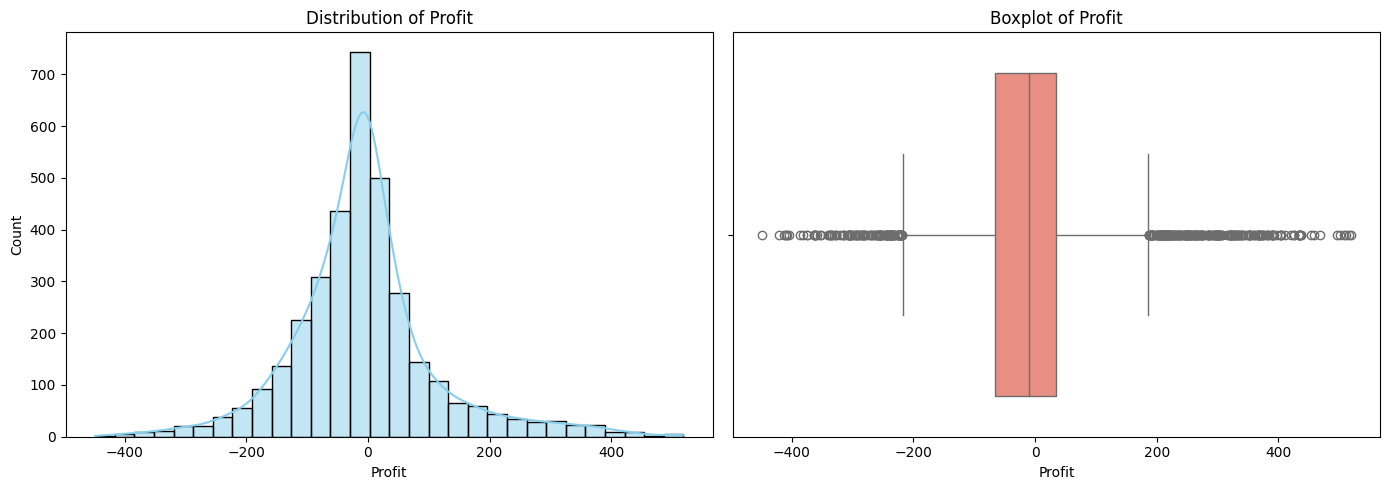

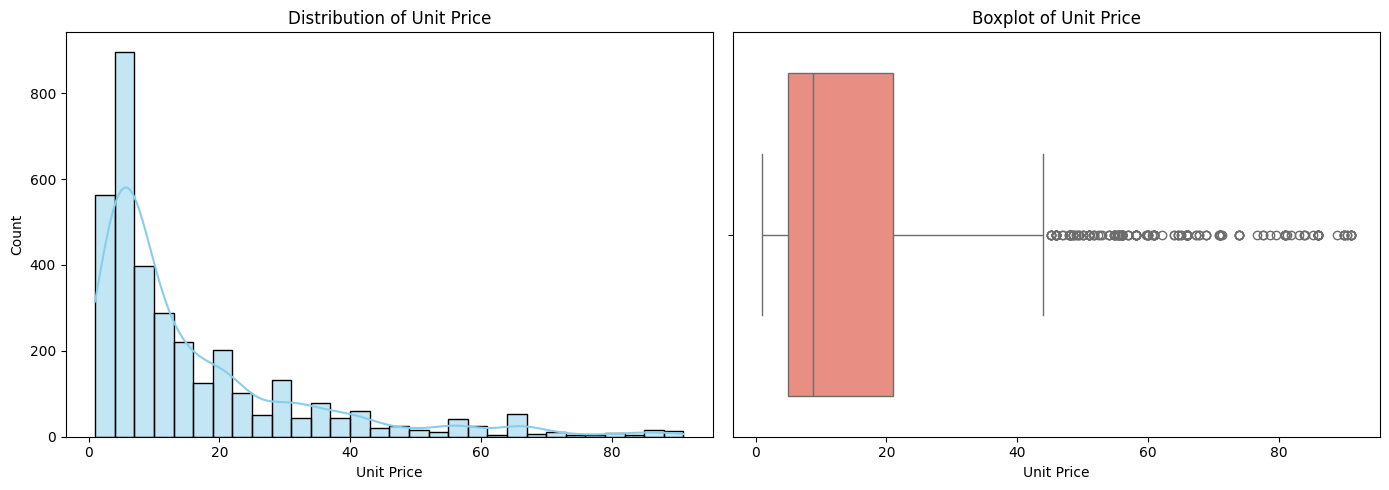

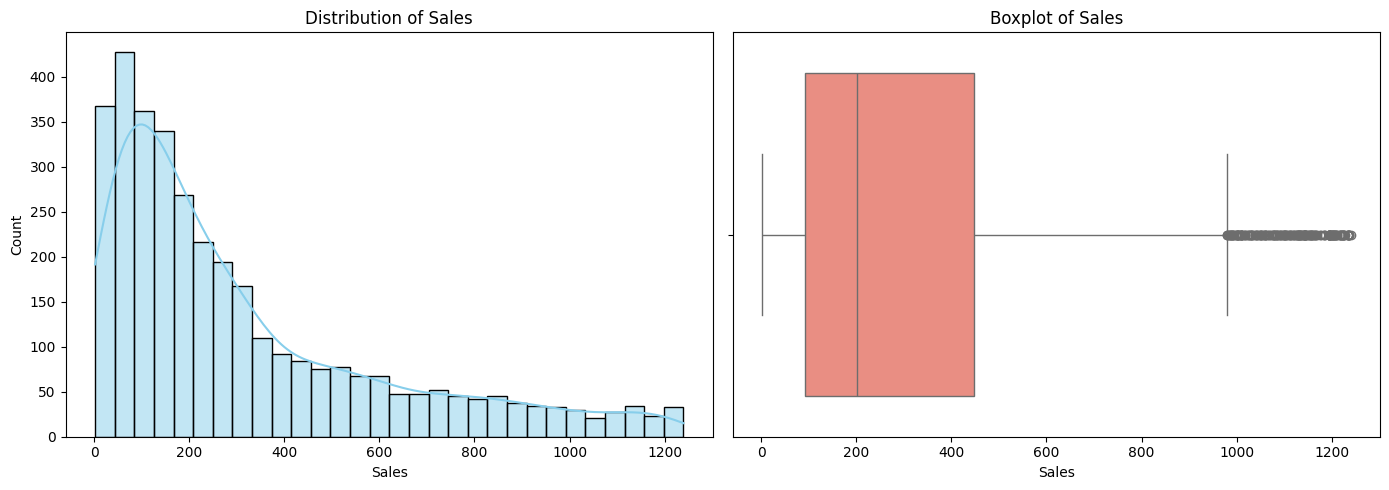

In [21]:
for col in ["Profit" , "Unit Price" , "Sales"] :
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(train_set[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=train_set[col], color='salmon')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [22]:
test_set['Shipping Cost (log)'] = np.log1p(test_set['Shipping Cost'])
test_set['Unit Price (log)'] = np.log1p(test_set['Unit Price'])

In [23]:
train_set['Shipping Cost (log)'] = np.log1p(train_set['Shipping Cost'])
train_set['Unit Price (log)'] = np.log1p(train_set['Unit Price'])

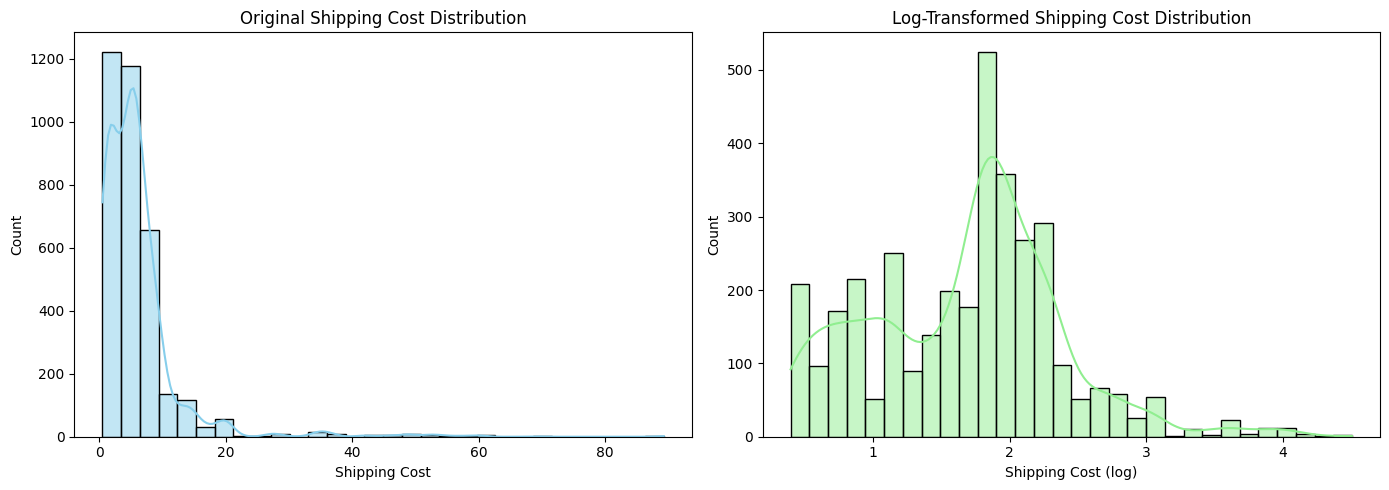

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(train_set['Shipping Cost'], kde=True, bins=30, color='skyblue')
plt.title("Original Shipping Cost Distribution")

plt.subplot(1, 2, 2)
sns.histplot(train_set['Shipping Cost (log)'], kde=True, bins=30, color='lightgreen')
plt.title("Log-Transformed Shipping Cost Distribution")

plt.tight_layout()
plt.show()


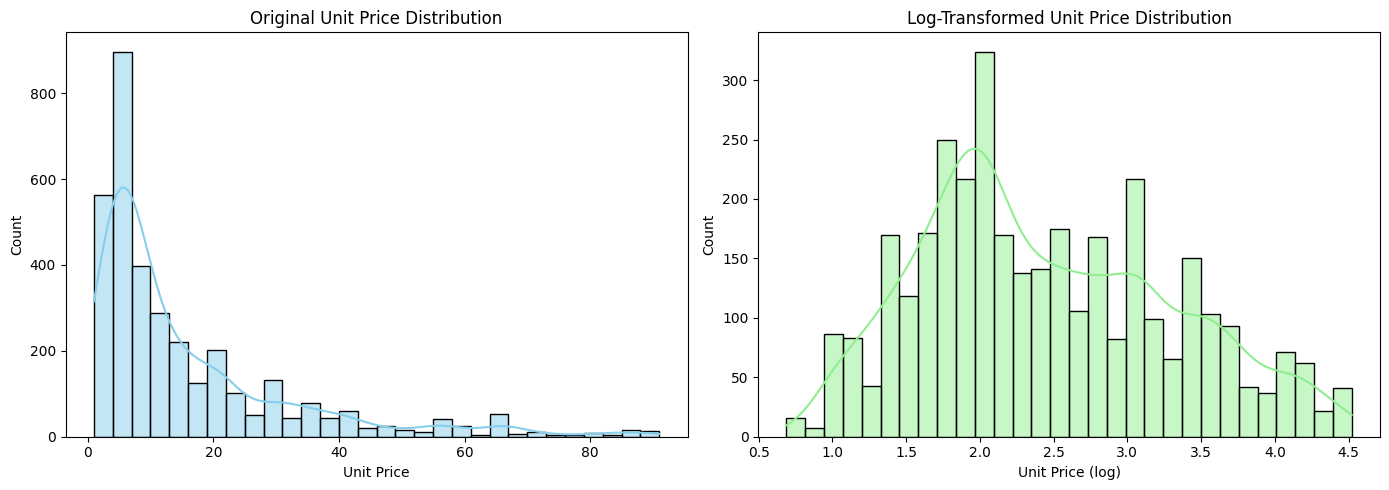

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(train_set['Unit Price'], kde=True, bins=30, color='skyblue')
plt.title("Original Unit Price Distribution")

plt.subplot(1, 2, 2)
sns.histplot(train_set['Unit Price (log)'], kde=True, bins=30, color='lightgreen')
plt.title("Log-Transformed Unit Price Distribution")

plt.tight_layout()
plt.show()


In [26]:
numerical = ["Sales", "Unit Price (log)", "Shipping Cost (log)", "Product Base Margin", "Discount"]
categorical = ["Product Category", "Product Sub-Category", "Product Container", "Customer Segment", "Ship Mode"]

In [31]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3467 entries, 1483 to 5226
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Date            3467 non-null   object 
 1   Order Priority        3467 non-null   object 
 2   Order Quantity        3467 non-null   float64
 3   Sales                 3467 non-null   float64
 4   Discount              3467 non-null   float64
 5   Ship Mode             3467 non-null   object 
 6   Profit                3467 non-null   float64
 7   Shipping Cost         3467 non-null   float64
 8   Customer Name         3467 non-null   object 
 9   Province              3467 non-null   object 
 10  Region                3467 non-null   object 
 11  Customer Segment      3467 non-null   object 
 12  Product Category      3467 non-null   object 
 13  Product Sub-Category  3467 non-null   object 
 14  Product Name          3467 non-null   object 
 15  Product Container     3

In [ ]:
train_set.drop("Unit Price" ,axis=1 ,inplace=True)
train_set.drop("Shipping Cost" ,axis=1 ,inplace=True)
train_set.drop("Discount_knn" ,axis=1 ,inplace=True)

In [34]:
train_set.to_csv('../data/train_clean.csv', index=False, encoding='utf-8-sig')

In [44]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

features = numerical + categorical
target = "Profit"

X_train = train_set[features]
y_train = train_set[target]
X_test = test_set[features]
y_test = test_set[target]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), numerical),
        ('onehot', Pipeline(steps=[
            ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ]), categorical)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        max_depth=20,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features=0.5,
        random_state=42
    ))
])

pipeline.fit(X_train, y_train)

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print("\nCross-validation R2 scores:", cv_scores)
print("Mean CV R2:", cv_scores.mean())
print("Std CV R2:", cv_scores.std())

y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nMean Squared Error (MSE) on test set: {mse}")
print(f"R-squared (R2) on test set: {r2}")
print(f"Mean Absolute Error (MAE) on test set: {mae:.2f}")

print("\nExample test:")
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(comparison.head())



Cross-validation R2 scores: [0.89195634 0.89886855 0.87386619 0.881237   0.90436298]
Mean CV R2: 0.890058209430026
Std CV R2: 0.011187911125084698

Mean Squared Error (MSE) on test set: 1235.8707657326866
R-squared (R2) on test set: 0.9137812964399854
Mean Absolute Error (MAE) on test set: 19.67

Example test:
      Actual   Predicted
3105  -65.62  -58.981102
549   163.78  132.709597
1163 -168.67 -166.302021
4442  515.64  474.515787
5481    1.87  -21.191480


In [26]:
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

features = numerical + categorical
target = "Profit"

X_train = train_set[features]
y_train = train_set[target]
X_test = test_set[features]
y_test = test_set[target]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler())
        ]), numerical),
        ('onehot', Pipeline(steps=[
            ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ]), categorical)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__max_features': [1.0,'sqrt', 0.5]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
print("\nCross-validation R2 scores:", cv_scores)
print("Mean CV R2:", cv_scores.mean())
print("Std CV R2:", cv_scores.std())

print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation R2:", grid_search.best_score_)

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_error(y_test, y_pred)

print(f"\nMean Squared Error (MSE) on test set: {mse}")
print(f"R-squared (R2) on test set: {r2}")
print(f"Mean Absolute Percentage Error (MAPE) on test set: {mape:.2f}%")

print("\n Example test:")
comparison = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
print(comparison.head())

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Cross-validation R2 scores: [0.89408542 0.89891273 0.87571653 0.87983413 0.90477755]
Mean CV R2: 0.8906652710680474
Std CV R2: 0.011132411016708931

Best parameters: {'regressor__max_depth': 20, 'regressor__max_features': 0.5, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best cross-validation R2: 0.8906652710680474

Mean Squared Error (MSE) on test set: 1247.370713104734
R-squared (R2) on test set: 0.9129790195507522
Mean Absolute Percentage Error (MAPE) on test set: 182.73%

 Example test:
      Actual   Predicted
3105  -65.62  -58.700123
549   163.78  131.336037
1163 -168.67 -165.574623
4442  515.64  476.716740
5481    1.87  -21.401025
